<a href="https://colab.research.google.com/github/fininsight/text-mining-tutorial/blob/master/99_%EA%B8%B0%ED%83%80%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국내 주식 수정주가 조회

## 1) 네이버 차트를 활용한 수정주가 수집

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import xml.etree.ElementTree as ET

In [145]:
def getStockPrice(StockCode, Count = 252) :
    ret = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close','volumn'])
    
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count={}&requestType=0"
    url = url.format(StockCode, Count)
    response = requests.get(url)
    
    e = ET.fromstring(response.text.replace('\n','').replace('\t',''))
    stock_history = []
    for item in e.find('chartdata').findall('item') :
        data = item.get('data').split('|')
        ret.loc[len(ret)] = data
        
    return ret

In [6]:
def getStockTotal(StockCode):
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx'
    params = {
        'cmp_cd' : StockCode
    }
    resp = requests.get(url, params = params)
    soup = BeautifulSoup(resp.content, 'html.parser')
    content = soup.find(id = 'cTB11').find_all('tr')[6].find(class_='num').text.strip()
    num, per = content.split('/')
    num = num.strip()
    per = per.strip()
    new_dict = {
        'num' : num,
        'percent' : per
    }
    return new_dict

In [7]:
url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx'
params = {
    'cmp_cd' : '005930'
}
resp = requests.get(url, params = params)
soup = BeautifulSoup(resp.content, 'html.parser')
content = soup.find(id = 'cTB11').find_all('tr')[6].find(class_='num').text.strip()
num, fer = content.split('/')
num = num.strip()
fer = fer.strip()
print(num)
print(fer)


5,969,782,550주
74.59%


In [8]:
samsung_price = getStockPrice('005930')

In [9]:
samsung_price.tail()

,date,open,high,low,close,volumn
247,20190628,47000,47000,46700,47000,12949231
248,20190701,47350,47400,46250,46600,11383522
249,20190702,46200,46900,45850,46250,8463073
250,20190703,45750,46350,45200,45400,9669368
251,20190704,45250,46200,45250,45900,4351547


In [10]:
samsung_dict = getStockTotal('005930')
samsung_dict

{'num': '5,969,782,550주', 'percent': '74.59%'}

In [11]:
samsung_dict['num']

'5,969,782,550주'

In [12]:
sk_price = getStockPrice('000660')

In [13]:
sk_dict = getStockTotal('000660')

In [14]:
num_list = {'company' : ['삼성전자', 'sk하이닉스', '셀트리온', '삼성바이오로직스', '현대차', 'Posco', 'LG화학', '삼성물산', '네이버', '현대모비스']
            , 'code' : ['005930','000660','068270','207940','005380','005490','051910','028260','035420','012330']}
            
df1 = pd.DataFrame(num_list)
df1

,company,code
0,삼성전자,005930
1,sk하이닉스,000660
2,셀트리온,068270
3,삼성바이오로직스,207940
4,현대차,005380
5,Posco,005490
6,LG화학,051910
7,삼성물산,028260
8,네이버,035420
9,현대모비스,012330


# 일단 하나 완성

In [15]:
def total():
    df_t = pd.DataFrame(columns = ['company', 'num', 'percent'])
    for i in range(10):
        data = df1.iloc[i]
        company = data.company
        code = data.code
        new_dict = {}
        new_dict['company'] = company
        new_dict['num'] = int(getStockTotal(code)['num'][:-1].replace(',',''))
        new_dict['percent'] = float(getStockTotal(code)['percent'][:-1])
        df_t.loc[len(df_t)] = new_dict
        # print(type(new_dict['num']), type(new_dict['percent'])) # int, float인것 확인함 
    return df_t

In [21]:
df = total()


In [138]:
df_t = df.merge(df1, on='company')
df_t


,company,num,percent,code
0,삼성전자,5969782550,74.59,005930
1,sk하이닉스,728002365,73.55,000660
2,셀트리온,128329070,75.83,068270
3,삼성바이오로직스,66165000,24.76,207940
4,현대차,213668187,65.55,005380
5,Posco,87186835,69.37,005490
6,LG화학,70592343,64.28,051910
7,삼성물산,189690043,52.09,028260
8,네이버,164813395,78.15,035420
9,현대모비스,95306694,66.41,012330


In [99]:
list(df_t.company)

['삼성전자',
 'sk하이닉스',
 '셀트리온',
 '삼성바이오로직스',
 '현대차',
 'Posco',
 'LG화학',
 '삼성물산',
 '네이버',
 '현대모비스']

In [120]:
def func():
    df = pd.DataFrame(columns = list(df_t.company))
    for i in range(10):
        data = df_t.iloc[i]
        company = data.company
        code = data.code
        num = data.num
        percent = data.percent
        a = getStockPrice(code)
        a['close'] = pd.to_numeric(a['close'])
        df_a = a['close'].apply(lambda x: x * num * percent/100)
        df_a.columns = [company]
#         print(df_b)
#         df.merge(df_b, how = 'outer', left_index=True, right_index=True)
        df[df_t['company'][i]]=df_a

    return df

In [121]:
total_df = func()
total_df

,삼성전자,sk하이닉스,셀트리온,삼성바이오로직스,현대차,Posco,LG화학,삼성물산,네이버,현대모비스
0,2.092845e+14,4.513808e+13,2.877699e+13,6.815101e+12,1.813770e+13,2.068468e+13,1.581380e+13,1.156072e+13,1.896076e+13,1.379791e+13
1,2.135147e+14,4.561998e+13,2.887265e+13,6.847866e+12,1.785759e+13,2.001938e+13,1.522390e+13,1.165953e+13,1.906393e+13,1.363968e+13
2,2.083939e+14,4.470972e+13,2.849021e+13,6.700424e+12,1.750744e+13,1.947505e+13,1.515584e+13,1.151131e+13,1.927028e+13,1.354474e+13
3,2.077260e+14,4.588770e+13,2.901599e+13,6.831483e+12,1.757747e+13,1.989842e+13,1.513315e+13,1.151131e+13,1.968308e+13,1.341815e+13
4,2.028278e+14,4.481681e+13,2.901599e+13,6.790527e+12,1.729735e+13,1.905167e+13,1.440712e+13,1.136310e+13,1.937345e+13,1.300675e+13
5,2.054995e+14,4.610188e+13,2.896821e+13,7.028073e+12,1.708726e+13,1.899119e+13,1.440712e+13,1.111607e+13,1.927028e+13,1.297510e+13
6,2.059448e+14,4.551289e+13,2.786878e+13,6.905204e+12,1.673711e+13,1.844686e+13,1.440712e+13,1.121488e+13,1.981201e+13,1.256370e+13
7,2.046090e+14,4.615542e+13,2.696056e+13,6.765954e+12,1.701723e+13,1.868879e+13,1.454325e+13,1.121488e+13,1.973461e+13,1.265864e+13
8,1.999335e+14,4.567352e+13,2.767756e+13,6.716806e+12,1.729735e+13,1.890047e+13,1.461132e+13,1.146191e+13,1.932192e+13,1.300675e+13
9,2.030505e+14,4.690505e+13,2.715178e+13,6.995308e+12,1.743741e+13,1.844686e+13,1.463400e+13,1.175834e+13,1.947662e+13,1.303839e+13


In [127]:
t_sum = total_df.sum(axis = 1)
to_sum = pd.DataFrame(t_sum, columns = ['시가총액'])
to_sum

,시가총액
0,3.889702e+14
1,3.923192e+14
2,3.847589e+14
3,3.866827e+14
4,3.779506e+14
5,3.814447e+14
6,3.794134e+14
7,3.783483e+14
8,3.746010e+14
9,3.788942e+14


In [139]:
total = total_df.join(to_sum)
total

,삼성전자,sk하이닉스,셀트리온,삼성바이오로직스,현대차,Posco,LG화학,삼성물산,네이버,현대모비스,시가총액
0,2.092845e+14,4.513808e+13,2.877699e+13,6.815101e+12,1.813770e+13,2.068468e+13,1.581380e+13,1.156072e+13,1.896076e+13,1.379791e+13,3.889702e+14
1,2.135147e+14,4.561998e+13,2.887265e+13,6.847866e+12,1.785759e+13,2.001938e+13,1.522390e+13,1.165953e+13,1.906393e+13,1.363968e+13,3.923192e+14
2,2.083939e+14,4.470972e+13,2.849021e+13,6.700424e+12,1.750744e+13,1.947505e+13,1.515584e+13,1.151131e+13,1.927028e+13,1.354474e+13,3.847589e+14
3,2.077260e+14,4.588770e+13,2.901599e+13,6.831483e+12,1.757747e+13,1.989842e+13,1.513315e+13,1.151131e+13,1.968308e+13,1.341815e+13,3.866827e+14
4,2.028278e+14,4.481681e+13,2.901599e+13,6.790527e+12,1.729735e+13,1.905167e+13,1.440712e+13,1.136310e+13,1.937345e+13,1.300675e+13,3.779506e+14
5,2.054995e+14,4.610188e+13,2.896821e+13,7.028073e+12,1.708726e+13,1.899119e+13,1.440712e+13,1.111607e+13,1.927028e+13,1.297510e+13,3.814447e+14
6,2.059448e+14,4.551289e+13,2.786878e+13,6.905204e+12,1.673711e+13,1.844686e+13,1.440712e+13,1.121488e+13,1.981201e+13,1.256370e+13,3.794134e+14
7,2.046090e+14,4.615542e+13,2.696056e+13,6.765954e+12,1.701723e+13,1.868879e+13,1.454325e+13,1.121488e+13,1.973461e+13,1.265864e+13,3.783483e+14
8,1.999335e+14,4.567352e+13,2.767756e+13,6.716806e+12,1.729735e+13,1.890047e+13,1.461132e+13,1.146191e+13,1.932192e+13,1.300675e+13,3.746010e+14
9,2.030505e+14,4.690505e+13,2.715178e+13,6.995308e+12,1.743741e+13,1.844686e+13,1.463400e+13,1.175834e+13,1.947662e+13,1.303839e+13,3.788942e+14


In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

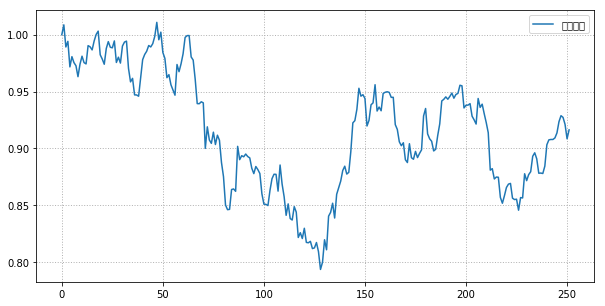

In [135]:
plt.figure(figsize = (10, 5))
plt.plot(total['시가총액'] / total['시가총액'].iloc[0])
plt.legend(loc = 0)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

## 2) Yahoo finance를 활용한 수정주가 조회

In [0]:
# yahoo 데이터 2/2 ~ 5/14 데이터 없음. 실제 사이트에도 없음
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data

start_date = '2019-01-02'
end_date='2019-05-17'
df=data.get_data_yahoo('005930.KS', start_date ,end_date)
df.tail()